# Understanding India

### Sync Death/Active/Recovered cases' rows

<br /><br />

In [182]:
# Setting the working directory
setwd("~/Documents/COVID-19-India/before-lockdown/")

In [183]:
#library(ggplot2)   # gg menns ->   grammer of graphics
library(tidyverse)
library(stringr)
library(lattice)
library(plyr) # used to calculate the average weight of each group 

In [184]:
growth = read.csv("ready_to_use/India_Aggregate_summary.csv")
india = read.csv("ready_to_use/India_Aggregate_dateWise_summary.csv")

india$Day = as.factor(india$Day)
class(india$Day)

[1] "factor"

In [185]:
tail(india)

,Country,Date,Day,Confirmed,New.Cases,Doubles.In,Deaths,Recovered,Active.Cases,Closed.Cases,Death.Rate
50,India,19/03/2020,50,173,22,5,4,20,149,24,2.31
51,India,20/03/2020,51,223,50,5,4,23,196,27,1.79
52,India,21/03/2020,52,283,60,4,4,23,256,27,1.41
53,India,22/03/2020,53,360,77,3,7,24,329,31,1.94
54,India,23/03/2020,54,433,73,3,7,24,402,31,1.62
55,India,24/03/2020,55,519,86,3,9,40,470,49,1.73


<br /><br />

In [186]:
options(repr.plot.width=16, repr.plot.height=8)

## Line Graplas

### Confirmed (cumulative) Cases over the days

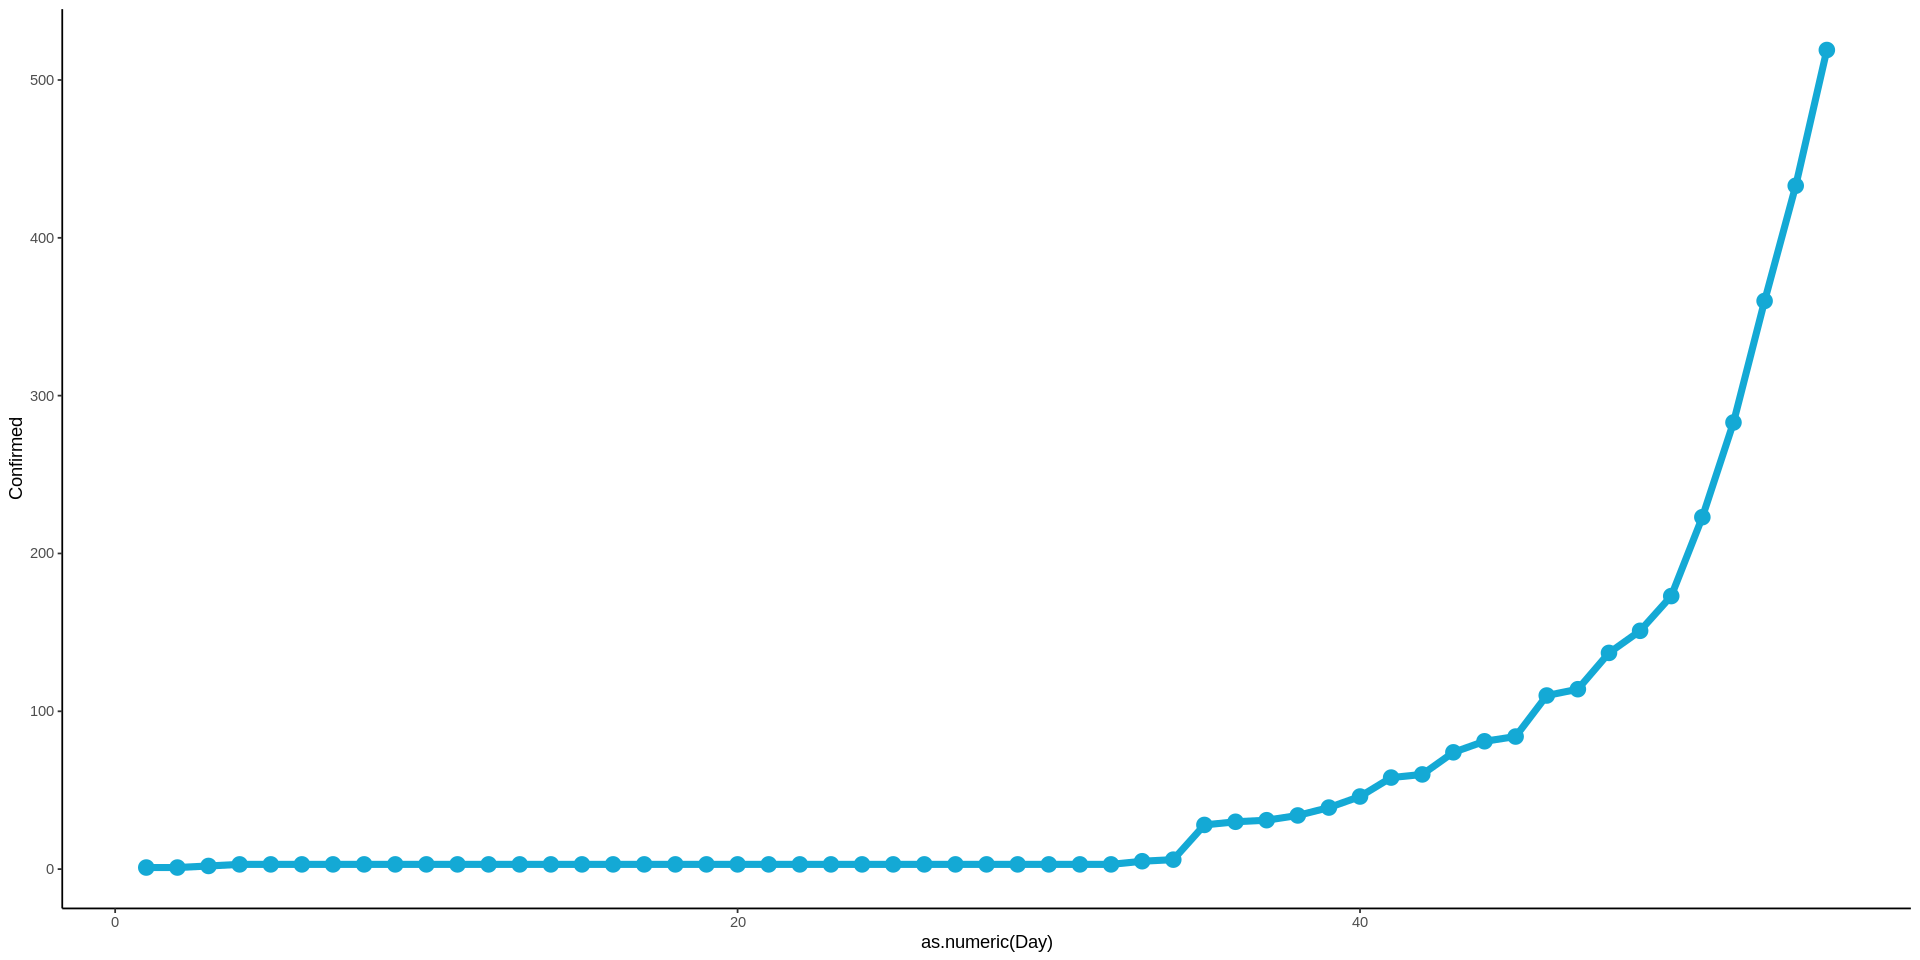

In [187]:
ggplot(india, aes(x=as.numeric(Day), y=Confirmed)) +
    geom_line(color = "#14a9d5", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#14a9d5", size=4)+
    theme_classic()

### New Cases over the days

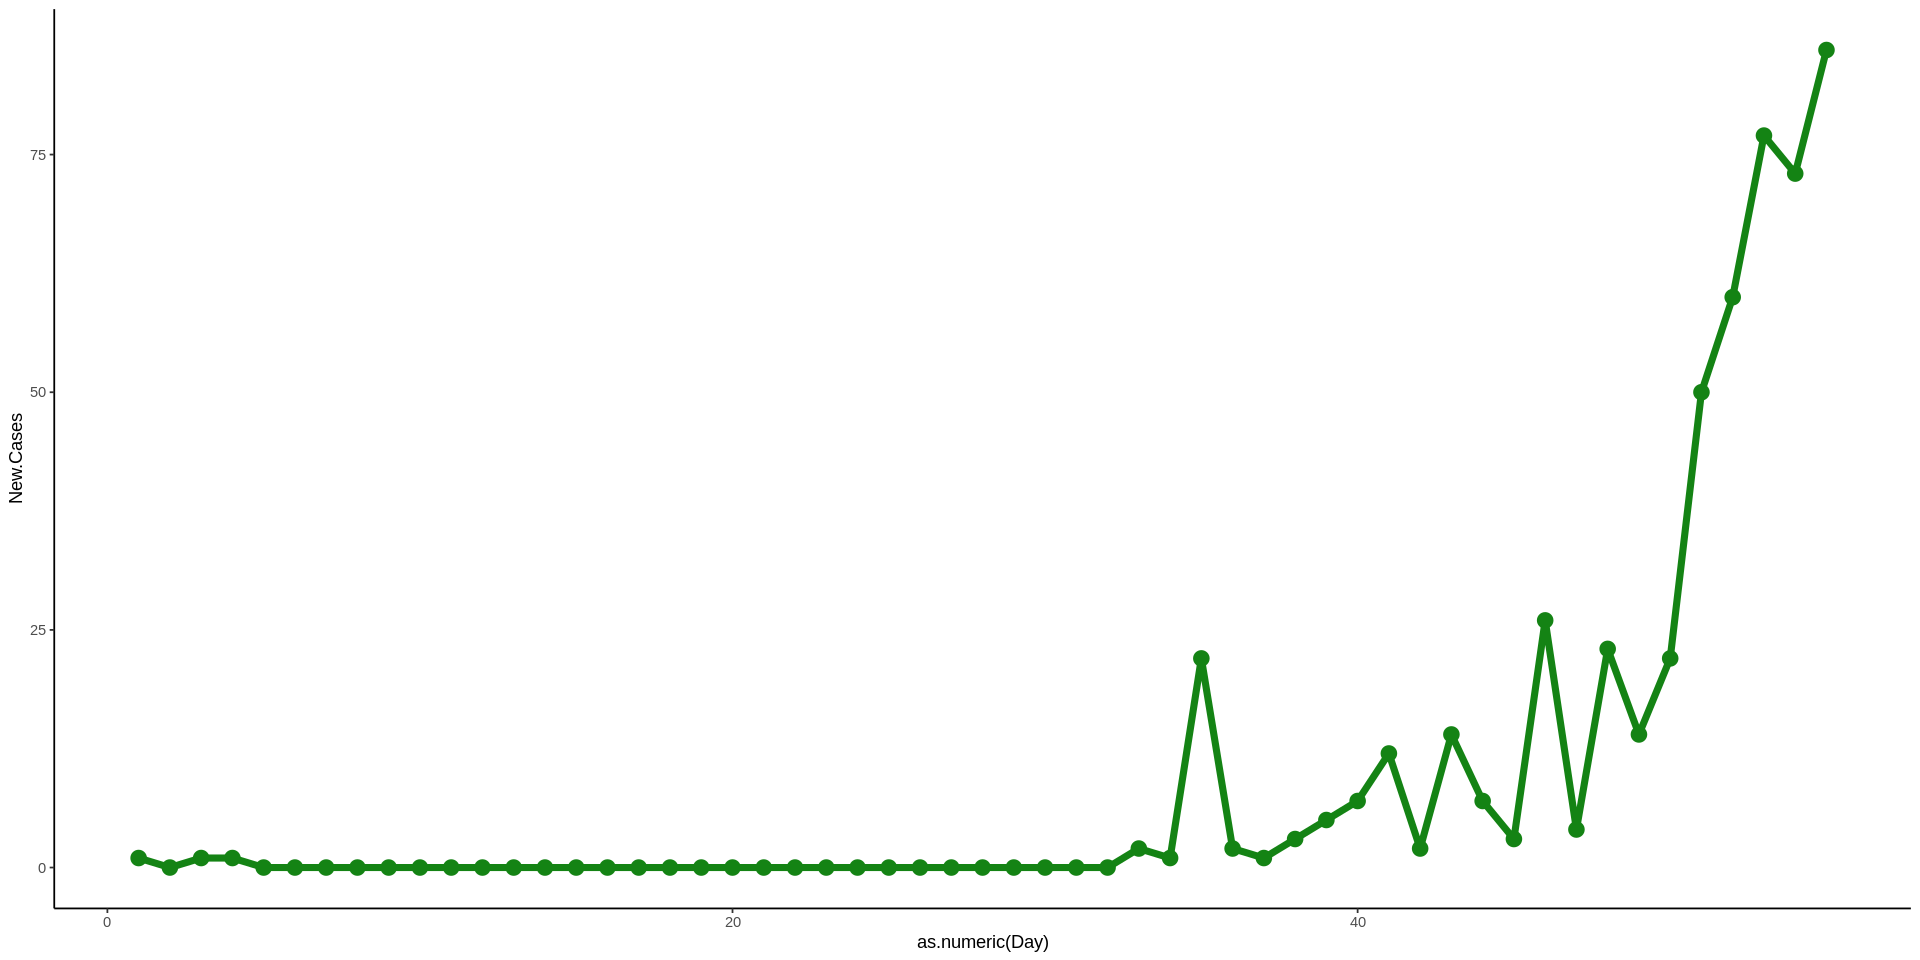

In [188]:
ggplot(india, aes(x=as.numeric(Day), y=New.Cases)) +
    geom_line(color = "#148314", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#148314", size=4)+
    theme_classic()

# Death Rate over the days

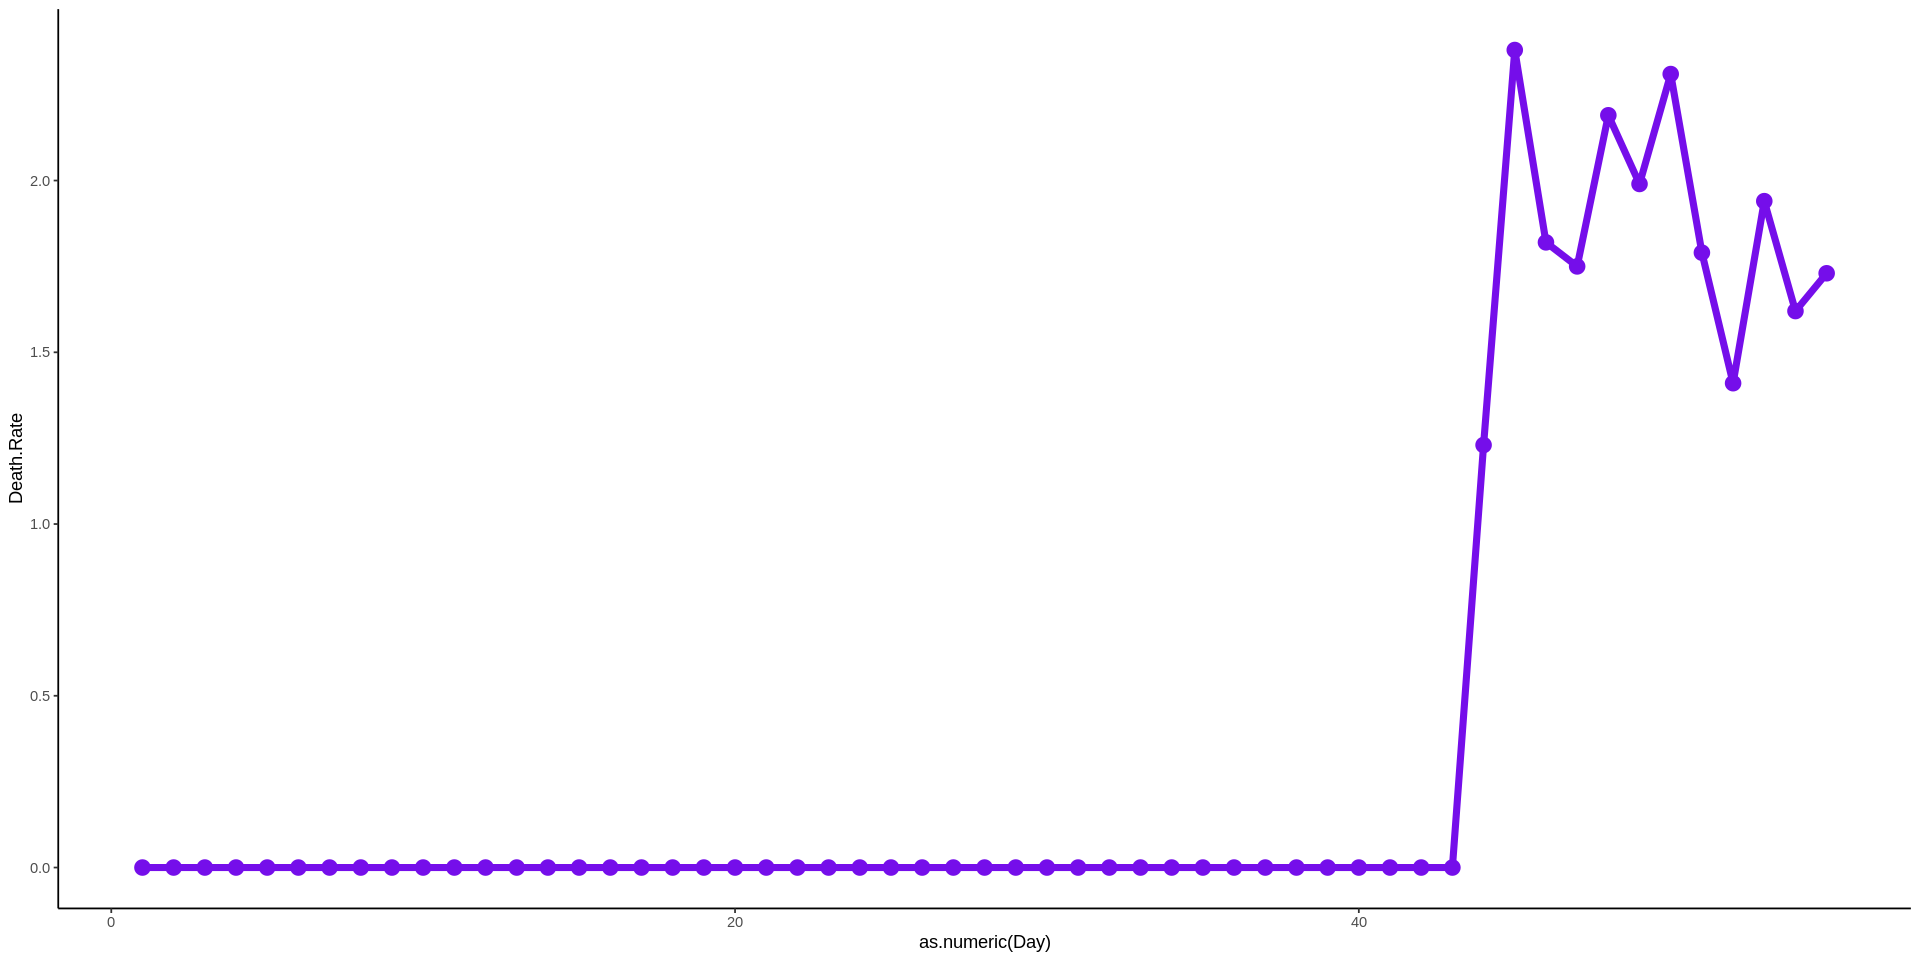

In [189]:
## death rate over the days
ggplot(india, aes(x=as.numeric(Day), y=Death.Rate)) +
    geom_line(color = "#750eea", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#750eea", size=4)+
    theme_classic()
    

<br />

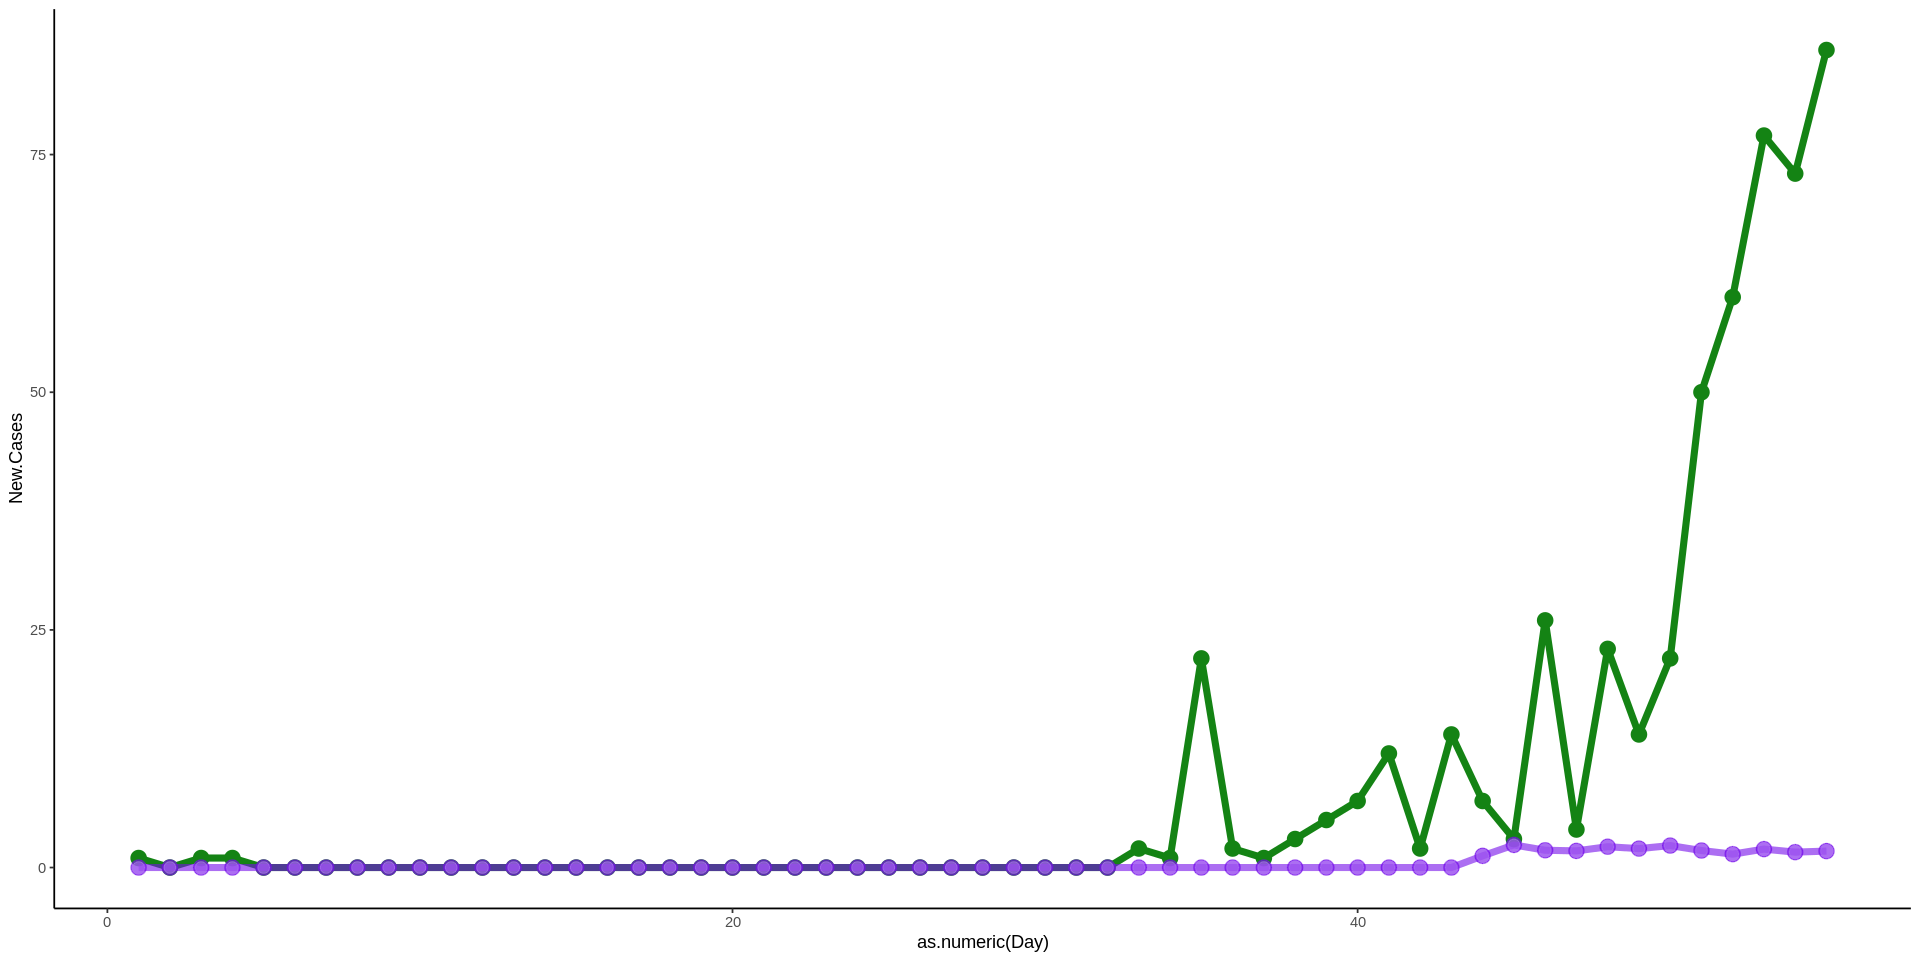

In [190]:
# merged
ggplot(india, aes(x=as.numeric(Day), y=New.Cases)) +
    geom_line(color = "#148314", size=2) +
    geom_point(color = "#ffffff", size=3) +
    geom_point(color = "#148314", size=4) +

    geom_line(aes(y=Death.Rate), color = "#750eea", size=2, alpha = 0.6) +
    geom_point(aes(y=Death.Rate), color = "#ffffff", size=3, alpha = 0.6) +
    geom_point(aes(y=Death.Rate), color = "#750eea", size=4, alpha = 0.6) +
    theme_classic()

<br /><br />

## Histograms

In [191]:
theme_set(theme_classic())

In [192]:
days = as.numeric(india$Day)
#days

<br />

#### Confirmed

In [193]:
#### adding 
df = NULL

d = NULL
conf = NULL
for(day in days){
    d = c(d, rep(day, as.numeric(india$Confirmed[day])))
    conf = c(conf, rep(1, as.numeric(india$Confirmed[day])))
}

df = cbind(Day = d, Confirmed = conf)

In [194]:
df = as.data.frame(df)

In [195]:
head(df)

Day,Confirmed
1,1
2,1
3,1
3,1
4,1
4,1


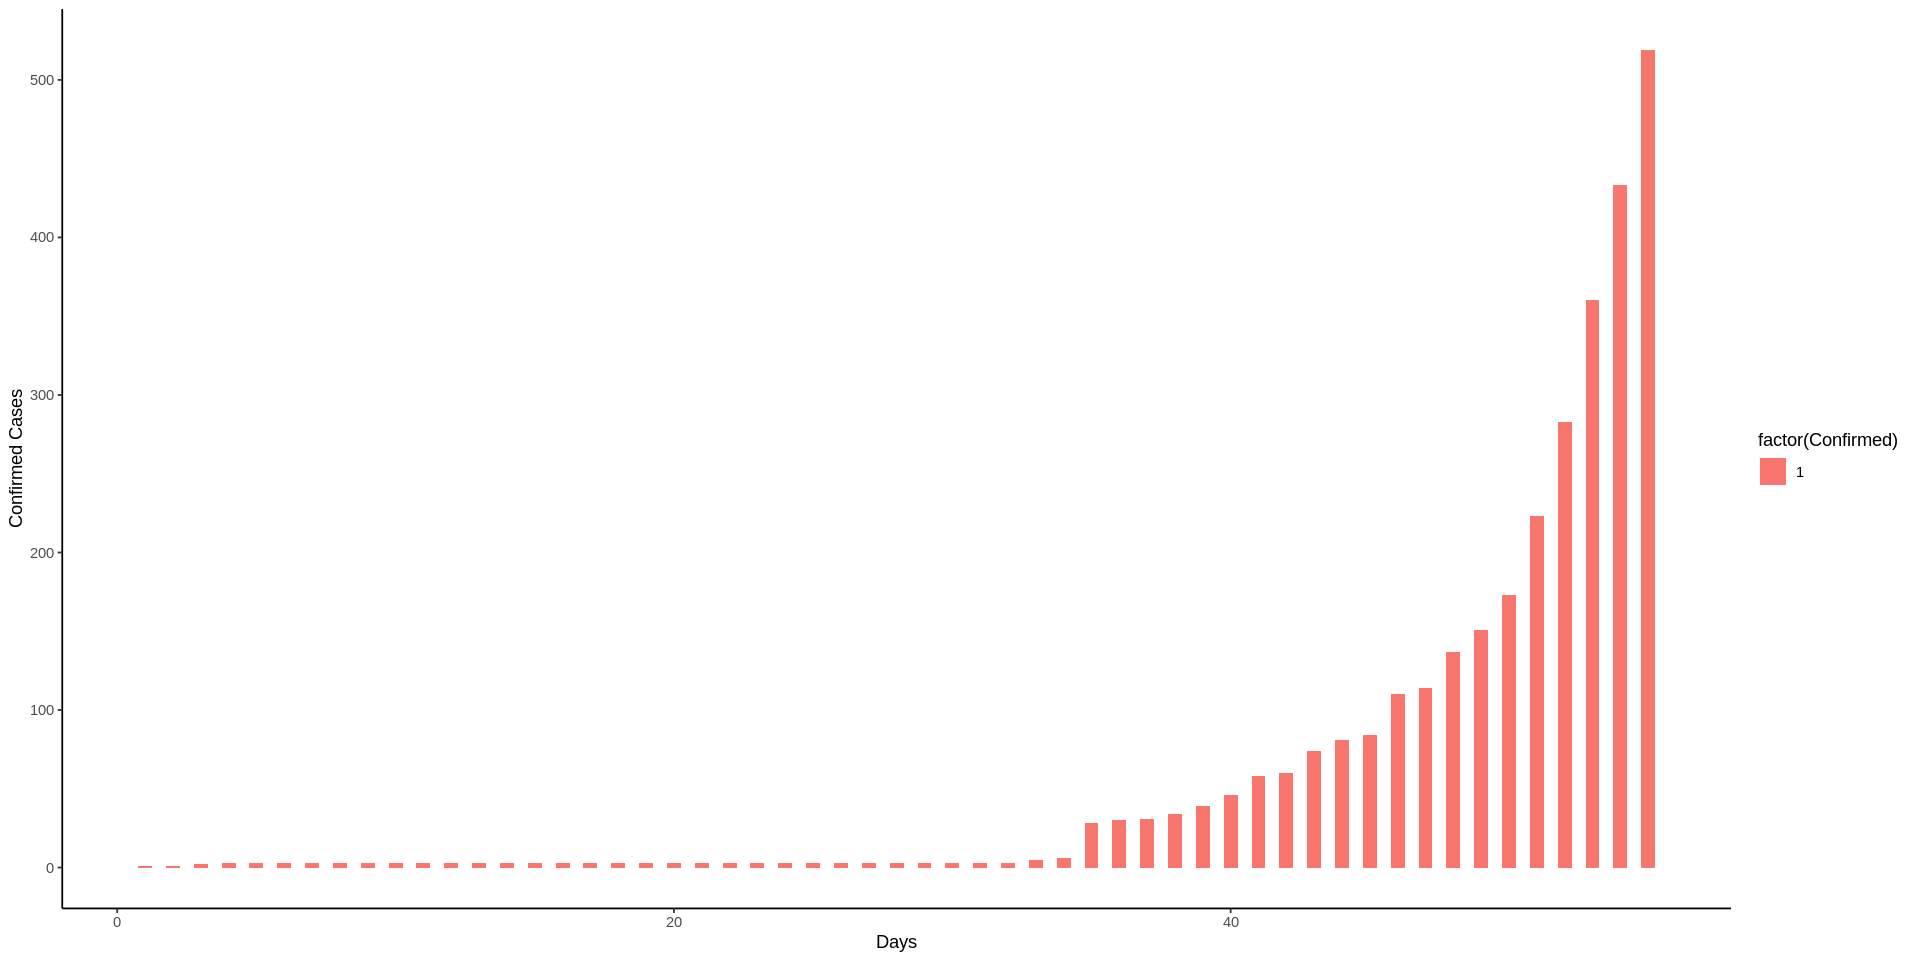

In [196]:
# Confirmed cases with Days
ggplot(df, aes(x = Day, fill = factor(Confirmed))) +
  geom_histogram(binwidth = 0.5) +
  xlab("Days") +
  ylab("Confirmed Cases")

<br /><br />


#### New Cases

In [197]:
## adding new cases

n = NULL
for(day in days){
    ones = as.numeric(india$New.Cases[day])
    zeros = as.numeric(india$Confirmed[day]) - as.numeric(india$New.Cases[day])
    
    n = c(n, c(rep('New', ones), rep('Old', zeros)))
    #n = c(n, c(rep(1, ones), rep(0, zeros)))
}

## 0: old cases
## 1: new cases

df = cbind(df, New = n)

In [198]:
head(df)

Day,Confirmed,New
1,1,New
2,1,Old
3,1,New
3,1,Old
4,1,New
4,1,Old


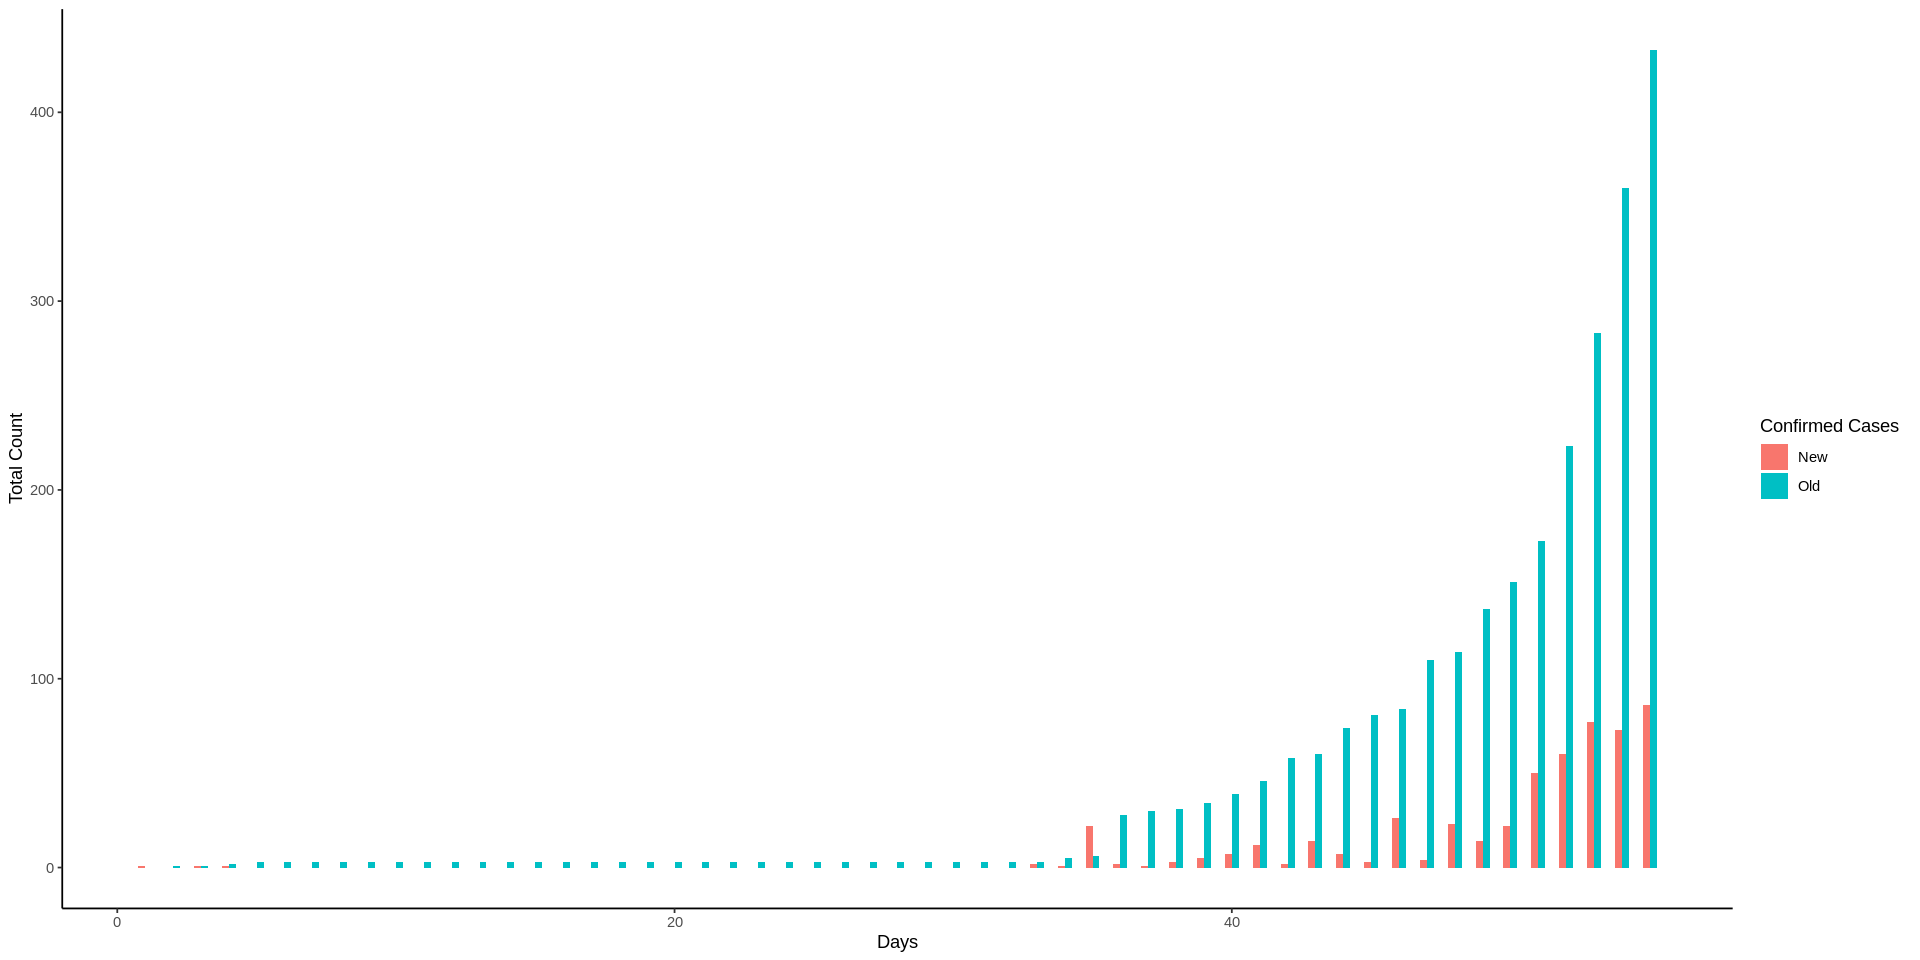

In [199]:
## days with old and new cases
ggplot(df, aes(x = Day, fill = factor(New))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br />

#### Active Cases

In [200]:
## adding case-status (Active/Closed)
# closed = 1
# active = 0

s = NULL
for(day in days){
    zeros = as.numeric(india$Active.Cases[day]) # active
    ones = as.numeric(india$Closed.Cases[day]) # closed
    
    s = c(s, c(rep('Active', zeros), rep('Closed', ones)))
    #s = c(s, c(rep(0, zeros), rep(1, ones)))
}

df = cbind(df, Status = s)

In [201]:
tail(df)

,Day,Confirmed,New,Status
3165,55,1,Old,Closed
3166,55,1,Old,Closed
3167,55,1,Old,Closed
3168,55,1,Old,Closed
3169,55,1,Old,Closed
3170,55,1,Old,Closed


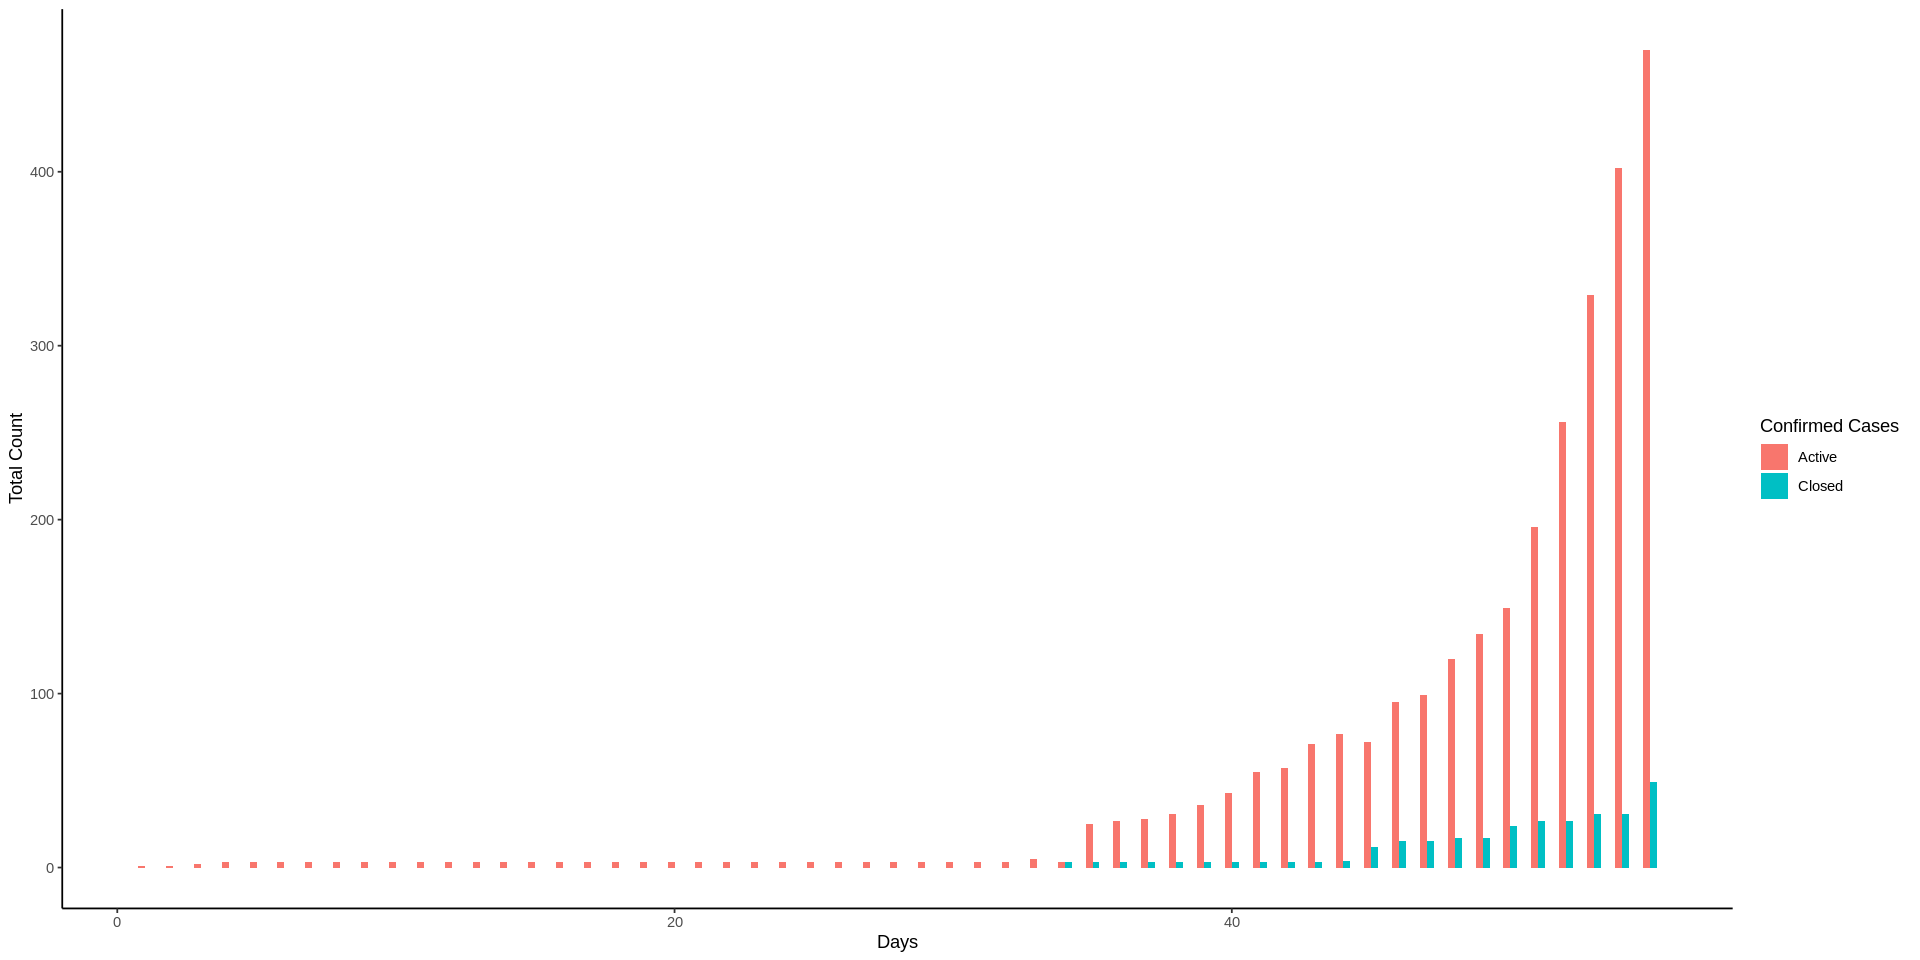

In [202]:
## days with status & confirmed
ggplot(df, aes(x = Day, fill = factor(Status))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />

In [203]:
# Adding deaths

## 0: not dead
## 1: dead
flag.day = -1
flag.deathCount = -1

df = cbind(df, Deaths = NA)
counter = 1

for(day in days){
        
        conf = as.numeric(india$Confirmed[day])
        deaths = as.numeric(india$Deaths[day])
        for(i in 1:conf){
            if(i > conf-deaths)
            {
                df$Deaths[counter] = 'Dead' #1
                counter = counter+1
            }
            else
            {
                df$Deaths[counter] = 'Alive' #0
                counter = counter+1
            }
        }
}

In [204]:
tail(df)

,Day,Confirmed,New,Status,Deaths
3165,55,1,Old,Closed,Dead
3166,55,1,Old,Closed,Dead
3167,55,1,Old,Closed,Dead
3168,55,1,Old,Closed,Dead
3169,55,1,Old,Closed,Dead
3170,55,1,Old,Closed,Dead


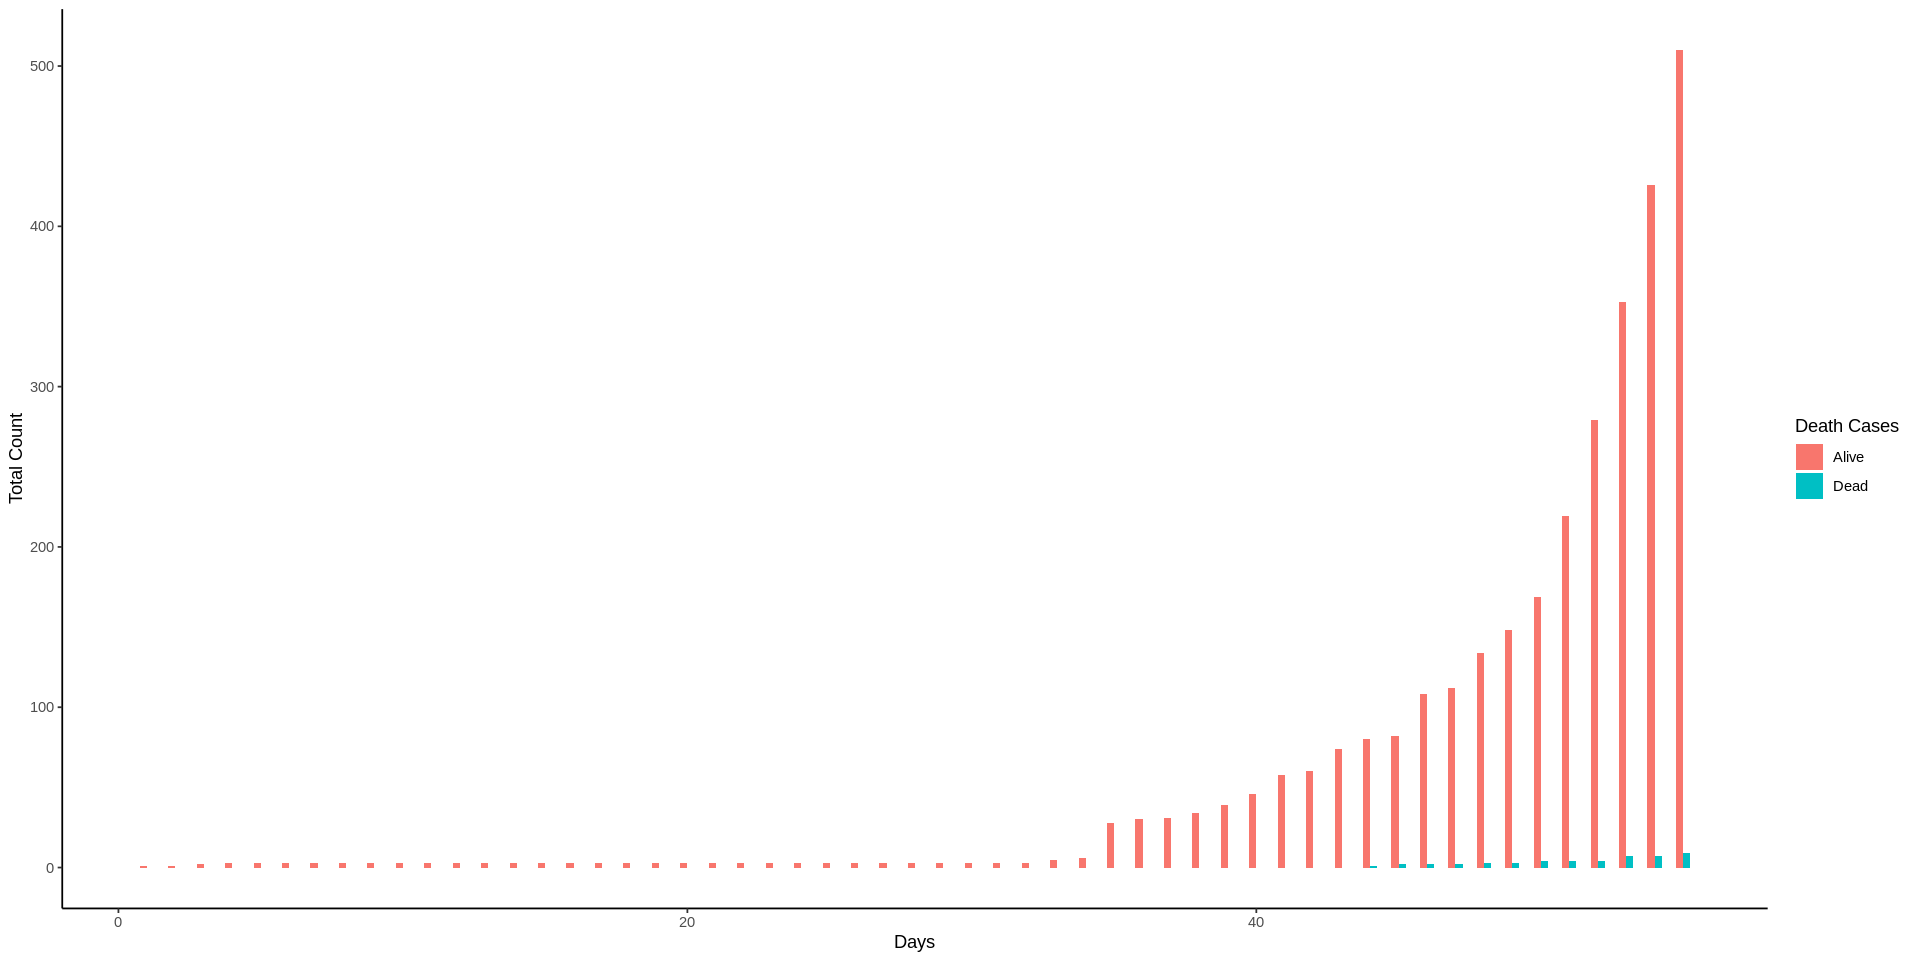

In [205]:
## days with deaths & confirmed
ggplot(df, aes(x = Day, fill = factor(Deaths))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Death Cases")

<br /><br />

In [206]:
# Adding Recovered
df = cbind(df, Recovered = NA)
## 0: not recovered
## 1: recovered


for(i in 1:nrow(df)){
    if(df$Status[i] == 'Active'){
        df$Recovered[i] = 'Not Recovered' #0
    }
    else{
        if(df$Deaths[i] == 'Alive'){
            df$Recovered[i] = 'Recovered' #1
        }
        else{
            df$Recovered[i] = 'Not Recovered' #0
        }
    }
}

In [207]:
#df = df[,-6]
tail(df)

,Day,Confirmed,New,Status,Deaths,Recovered
3165,55,1,Old,Closed,Dead,Not Recovered
3166,55,1,Old,Closed,Dead,Not Recovered
3167,55,1,Old,Closed,Dead,Not Recovered
3168,55,1,Old,Closed,Dead,Not Recovered
3169,55,1,Old,Closed,Dead,Not Recovered
3170,55,1,Old,Closed,Dead,Not Recovered


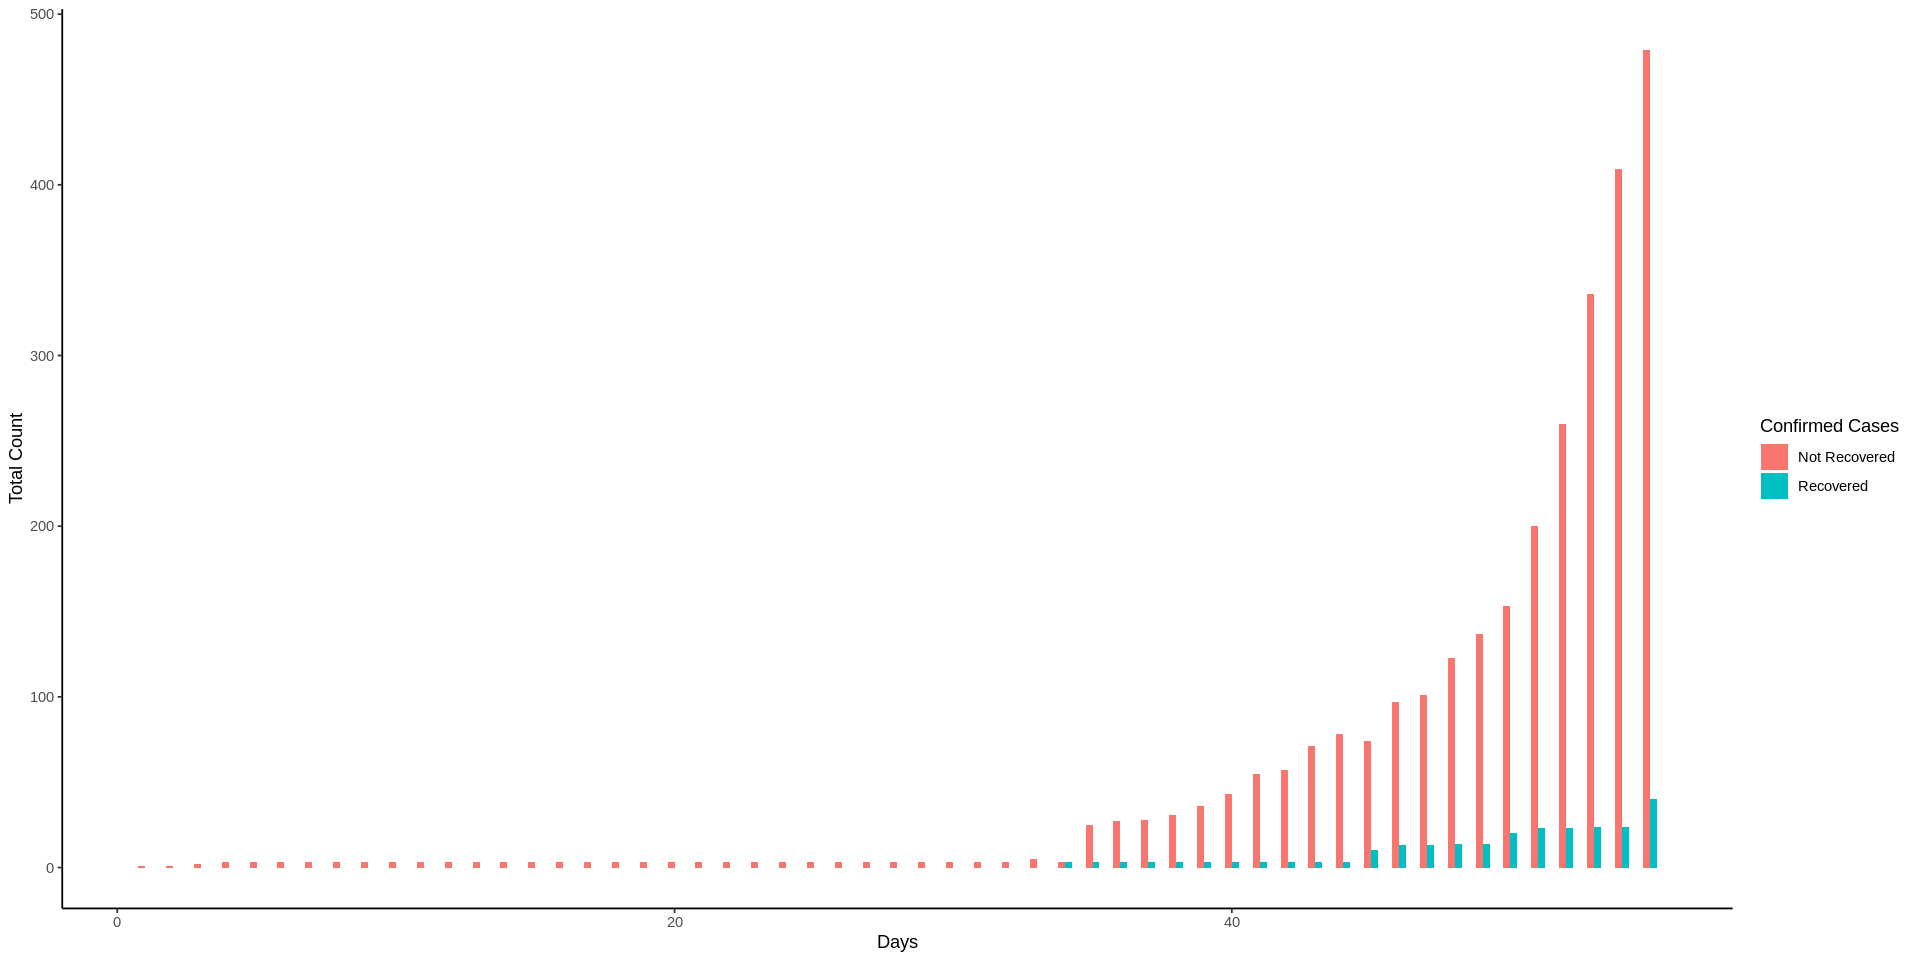

In [208]:
## days with recovered & confirmed
ggplot(df, aes(x = Day, fill = factor(Recovered))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />

In [209]:
# Adding Overall Status ---> active/dead/recovered
df = cbind(df, Overall.Status = NA)
## 0: not recovered
## 1: recovered


for(i in 1:nrow(df)){
    if(df$Status[i] == 'Active'){
        df$Overall.Status[i] = 'Active' #1  # active
    }
    else{
        if(df$Deaths[i] == 'Alive'){
            df$Overall.Status[i] = 'Alive' #2 # recovered
        }
        else{
            df$Overall.Status[i] = 'Dead' #3 # dead
        }
    }
}

In [210]:
tail(df)

,Day,Confirmed,New,Status,Deaths,Recovered,Overall.Status
3165,55,1,Old,Closed,Dead,Not Recovered,Dead
3166,55,1,Old,Closed,Dead,Not Recovered,Dead
3167,55,1,Old,Closed,Dead,Not Recovered,Dead
3168,55,1,Old,Closed,Dead,Not Recovered,Dead
3169,55,1,Old,Closed,Dead,Not Recovered,Dead
3170,55,1,Old,Closed,Dead,Not Recovered,Dead


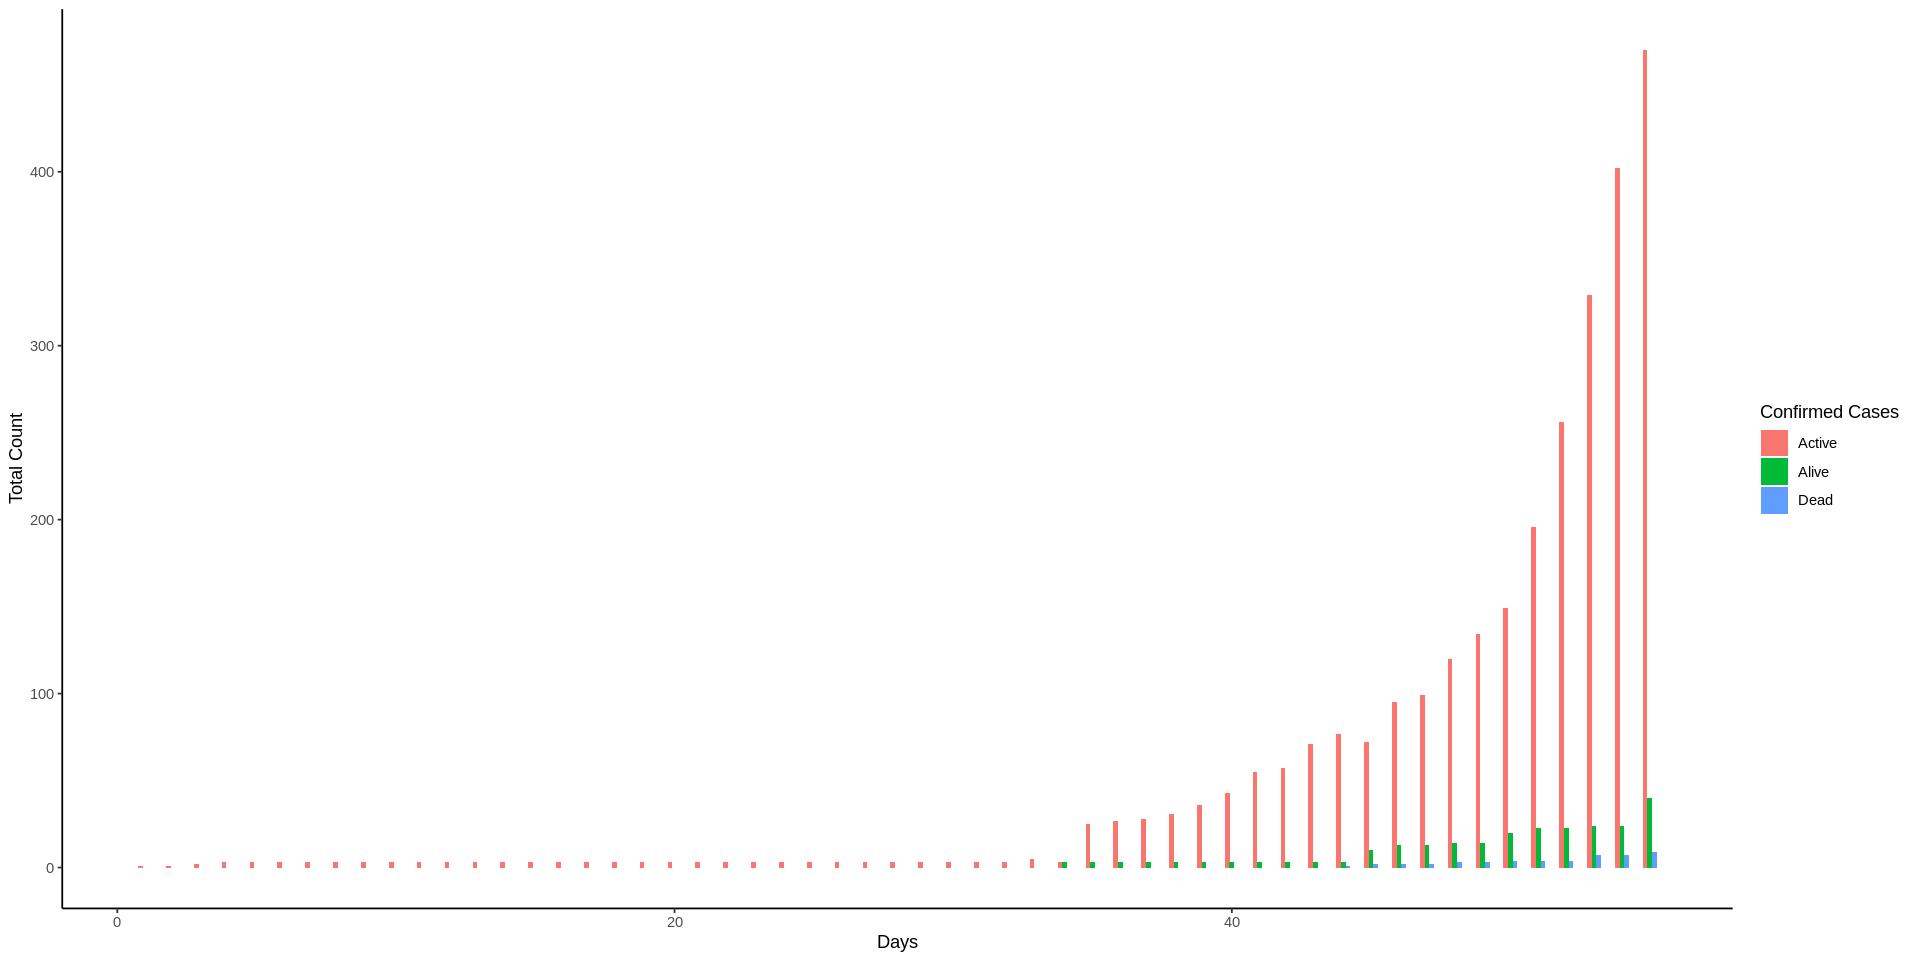

In [211]:
## days with recovered & confirmed
ggplot(df, aes(x = Day, fill = factor(Overall.Status))) +
  geom_histogram(binwidth = 0.5, position="dodge") +
  xlab("Days") +
  ylab("Total Count") +
  labs(fill = "Confirmed Cases")

<br /><br />